<a href="https://colab.research.google.com/github/ronald-duarte/ds1/blob/main/Copia_de_DEF_ProyectoDS_Final_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRIMERA ENTREGA DATA SCIENCE 1.- RONALD DUARTE

## Sobre el Dataset:



 Netflix es una de las plataformas de transmisión de video y medios más populares. Tienen más de 8.000 películas o programas de televisión disponibles en su plataforma y, a mediados de 2024, tienen más de 282 millones de suscriptores en todo el mundo. Este conjunto de datos tabulares consta de listados de todas las películas y programas de televisión disponibles en Netflix, junto con detalles como: reparto, directores, calificaciones, año de lanzamiento, duración y más.

Descripción de Columnas:

1. show_id: Identificador único para cada programa
2. type: Especifica si el título es una "Movie" o un "TV Show".
3. title: El nombre del título
4. director: Director del titulo
5. cast: Los principales actores involucradas en el título.
6. country: El país donde se produjo el título.
7. date_added: La fecha en que se agregó el título a Netflix.
8. release_year: El año en que se lanzó originalmente el título.
9. rating: La clasificación del contenido ( ejemplos:"PG-13", "TV-MA").
10. duration: Duración de la película (en minutos) o número de temporadas de TV Show.
11. listed_in: Categorías o géneros a los que pertenece el título("Documentaries", "TV Dramas").
12. description: La descripción resumida



El dataset fue tomado de https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows

El link a la carpeta de Drive con el archivo del dataset es el siguiente: https://1drv.ms/f/c/019289581e4af24d/Enz4NbNrZ7NMhmvZZ7VXkqABuhfNozLwg9iWUFb1UKuiNA?e=djcN9g

## Importar las librerias

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer


## Conectar al Dataset. Se subio el CSV a Colab

In [275]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leemos el conjunto de datos

In [276]:
# Ruta del archivo en Google Drive - Cartola 2023
net= pd.read_csv('/content/drive/MyDrive/Datasets trabajo final DS/netflix_titles.csv')

## Exploración de los datos


In [277]:
print('Valores nulos del conjunto de datos')
print (net.isnull().sum())

Valores nulos del conjunto de datos
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [278]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Separar el año en que se agrego "date_added" porque en esta columna esta la fecha con el mes.



In [279]:
import re
def extract_four_digits(text):
# Convert el input a un string para solucionan los NAN
 if pd.isnull(text):
   return []
 tex= str(text)
 return re.findall(r'\b\d{4}\b', text)

net['year_added'] = net['date_added'].apply(lambda x: extract_four_digits(x))
net['year_added'] = net['year_added'].apply(lambda x: int(x[0]) if x else np.nan)
net['year_added'] = net['year_added'].astype(pd.Int64Dtype()) #para convertirlo en numero entero

In [280]:
# Separamos la duración de las peliculas y series (las peliculas estan en minutos y las series en temporadas)
net['numero_duracion'] = pd.to_numeric(net['duration'].str.extract('(\d+)', expand=False), errors='coerce').fillna(0).astype(int)

In [281]:
net['time_added']= net['year_added']-net['release_year']

In [282]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,numero_duracion,time_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,90,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2,0


## Al observar los datos observamos que vamos a aplicar Clustering (aprendizaje no supervisado), y utilizaremos las columnas type, listed_in, country, release_year, Year_added, duracion. Para lo cual realizaremos limpieza de los datos.

In [283]:
# prompt: como hago para la columna listed_in separar lo que indica dentro  que tiene comas,, y generar varias columnas con esos datos para cada linea

# Assuming your DataFrame is named 'net' as in your provided code.

# Split the 'listed_in' column by comma and create new columns
listed_in_split = net['listed_in'].str.split(', ', expand=True)

# Rename the new columns
listed_in_split.columns = ['listed_in_' + str(i+1) for i in range(listed_in_split.shape[1])]

# Concatenate the new columns with the original DataFrame
net = pd.concat([net, listed_in_split], axis=1)

net.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,numero_duracion,time_added,listed_in_1,listed_in_2,listed_in_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,90,1,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2,0,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1,0,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1,0,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2,0,International TV Shows,Romantic TV Shows,TV Comedies


# realizaremos dummies a las columnas, type, listed_in

In [284]:
# Crear variables dummies
net_dummies = pd.get_dummies(net, columns=['type','listed_in'])

# Select only numerical columns before converting to integers
numerical_cols = net_dummies.select_dtypes(include=np.number).columns
# Fill NA values with 0 before converting to integers
net_dummies[numerical_cols] = net_dummies[numerical_cols].fillna(0).astype(int)
net_dummies = net_dummies.replace({True: 1, False: 0})

print(net_dummies.dtypes)  # Para verificar los tipos de datos

<ipython-input-284-7dcf398377af>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  net_dummies = net_dummies.replace({True: 1, False: 0})


show_id                                             object
title                                               object
director                                            object
cast                                                object
country                                             object
                                                     ...  
listed_in_TV Horror, TV Mysteries, Teen TV Shows     int64
listed_in_TV Horror, Teen TV Shows                   int64
listed_in_TV Sci-Fi & Fantasy, TV Thrillers          int64
listed_in_TV Shows                                   int64
listed_in_Thrillers                                  int64
Length: 532, dtype: object


In [285]:
net_dummies.head()


,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,...,"listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",...,0,0,0,0,0,0,0,0,0,0
1,s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",...,0,0,0,0,0,0,0,0,0,0
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,...,0,0,0,0,0,0,0,0,0,0
3,s4,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",...,0,0,0,0,0,0,0,0,0,0
4,s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,...,0,0,0,0,0,0,0,0,0,0


## Al observar los datos observamos que vamos a aplicar Clustering (aprendizaje no supervisado), y utilizaremos las columnas type, listed_in, country, release_year, Year_added, duracion.

In [286]:
selected_columns = [
    'release_year', 'numero_duracion',
    'type_Movie', 'type_TV Show',
    'listed_in_Action & Adventure', 'listed_in_Comedies',
    'listed_in_Documentaries', 'listed_in_Dramas',
    'listed_in_Horror Movies', 'listed_in_Independent Movies',
    'listed_in_International Movies', 'listed_in_Music & Musicals',
    'listed_in_Stand-Up Comedy', 'listed_in_TV Shows', 'year_added'
]
df_clustering = net_dummies[selected_columns]

In [287]:
df_clustering

,release_year,numero_duracion,type_Movie,type_TV Show,listed_in_Action & Adventure,listed_in_Comedies,listed_in_Documentaries,listed_in_Dramas,listed_in_Horror Movies,listed_in_Independent Movies,listed_in_International Movies,listed_in_Music & Musicals,listed_in_Stand-Up Comedy,listed_in_TV Shows,year_added
0,2020,90,1,0,0,0,1,0,0,0,0,0,0,0,2021
1,2021,2,0,1,0,0,0,0,0,0,0,0,0,0,2021
2,2021,1,0,1,0,0,0,0,0,0,0,0,0,0,2021
3,2021,1,0,1,0,0,0,0,0,0,0,0,0,0,2021
4,2021,2,0,1,0,0,0,0,0,0,0,0,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,2007,158,1,0,0,0,0,0,0,0,0,0,0,0,2019
8803,2018,2,0,1,0,0,0,0,0,0,0,0,0,0,2019
8804,2009,88,1,0,0,0,0,0,0,0,0,0,0,0,2019
8805,2006,88,1,0,0,0,0,0,0,0,0,0,0,0,2020


In [288]:
print(df_clustering.dtypes)  # Para verificar los tipos de datos

release_year                      int64
numero_duracion                   int64
type_Movie                        int64
type_TV Show                      int64
listed_in_Action & Adventure      int64
listed_in_Comedies                int64
listed_in_Documentaries           int64
listed_in_Dramas                  int64
listed_in_Horror Movies           int64
listed_in_Independent Movies      int64
listed_in_International Movies    int64
listed_in_Music & Musicals        int64
listed_in_Stand-Up Comedy         int64
listed_in_TV Shows                int64
year_added                        int64
dtype: object


## Elección de k con la regla de codo
Para elegir el numero de clusters idoneos se hace varias ejecuciones con k diferentes (desde 1  cluster hasta 12) y representaremos en un gráfico la distancia media de cada punto hasta su centroide y el tiempo de entrenamiento necesario.

La idea es que a medida que vamos aumentando la cantidad de centroides, la distancia media de los puntos al centroide irá disminuyendo cada vez menos. La norma  nemotecnia  es la norma del codo puesto que la gráfica es una curva y el número de clústers óptimo será el ‘codo’ del brazo.

La librería yellowbrick tiene un método rápido para visualizar esto.

Escalado de los datos: se utiliza el objeto StandardScaler para estandarizar los datos, es decir, para transformar las características de forma que tengan una media de cero y una desviación estándar de uno.  

In [289]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled

array([[ 0.65993048,  0.39702971,  0.66065906, ..., -0.19854302,
        -0.04266196,  0.06499849],
       [ 0.77332444, -1.33458448, -1.51364003, ..., -0.19854302,
        -0.04266196,  0.06499849],
       [ 0.77332444, -1.35426192, -1.51364003, ..., -0.19854302,
        -0.04266196,  0.06499849],
       ...,
       [-0.58740315,  0.35767484,  0.66065906, ..., -0.19854302,
        -0.04266196,  0.03559048],
       [-0.92758504,  0.35767484,  0.66065906, ..., -0.19854302,
        -0.04266196,  0.05029448],
       [ 0.09296065,  0.81025583,  0.66065906, ..., -0.19854302,
        -0.04266196,  0.03559048]])

## Regla del codo con los datos estandarizados, dan tres cluster en vez de 3 cluster que daba antes

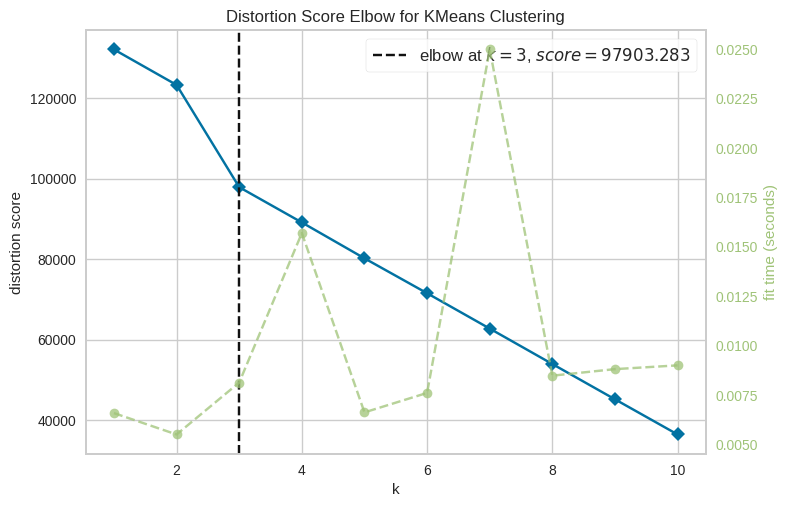

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [290]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df_scaled)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [291]:
# Aplicar K-Means con el número óptimo de clusters (ajusta "k")
k_optimo = 3  #definido en el metodo codo
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
net_dummies["cluster"] = kmeans.fit_predict(df_scaled)

# Mostrar los primeros resultados
print(net_dummies[["title", "cluster"]].head(10))

                              title  cluster
0              Dick Johnson Is Dead        2
1                     Blood & Water        0
2                         Ganglands        0
3             Jailbirds New Orleans        0
4                      Kota Factory        0
5                     Midnight Mass        0
6  My Little Pony: A New Generation        2
7                           Sankofa        2
8     The Great British Baking Show        0
9                      The Starling        2


Clustering con K-Means: se utiliza el algoritmo de K-Means para agrupar los datos en un número predefinido de clústeres. En este caso, se define n_clusters=2 para indicar que se desean 2 clústeres, dedo que el metodo codo da 2.

In [292]:
# ¿Cuántos elementos tiene cada cluster?
net_dummies["cluster"].value_counts()

,count
cluster,
2,5797
0,2676
1,334


In [293]:
# Analizar las características de cada cluster
# se excluyen las columnas que no son numericas
numeric_features = net_dummies.select_dtypes(include=np.number)
cluster_means = numeric_features.groupby("cluster").mean()
cluster_means


,release_year,year_added,numero_duracion,time_added,type_Movie,type_TV Show,listed_in_Action & Adventure,"listed_in_Action & Adventure, Anime Features","listed_in_Action & Adventure, Anime Features, Children & Family Movies","listed_in_Action & Adventure, Anime Features, Classic Movies",...,"listed_in_TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","listed_in_TV Dramas, TV Thrillers","listed_in_TV Dramas, Teen TV Shows","listed_in_TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","listed_in_TV Horror, TV Mysteries, TV Thrillers","listed_in_TV Horror, TV Mysteries, Teen TV Shows","listed_in_TV Horror, Teen TV Shows","listed_in_TV Sci-Fi & Fantasy, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
cluster,,,,,,,,,,,,,,,,,,,,,
0,2016.605755,2011.379297,1.764948,2.289611,0.0,1.0,0.00000,0.000000,0.00000,0.000000,...,0.000374,0.001868,0.002242,0.001495,0.001495,0.000374,0.000747,0.000374,0.005979,0.000000
1,2015.616766,2018.017964,66.913174,2.401198,1.0,0.0,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2012.977747,2018.897188,101.407625,5.919441,1.0,0.0,0.02208,0.000173,0.00069,0.000345,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011213


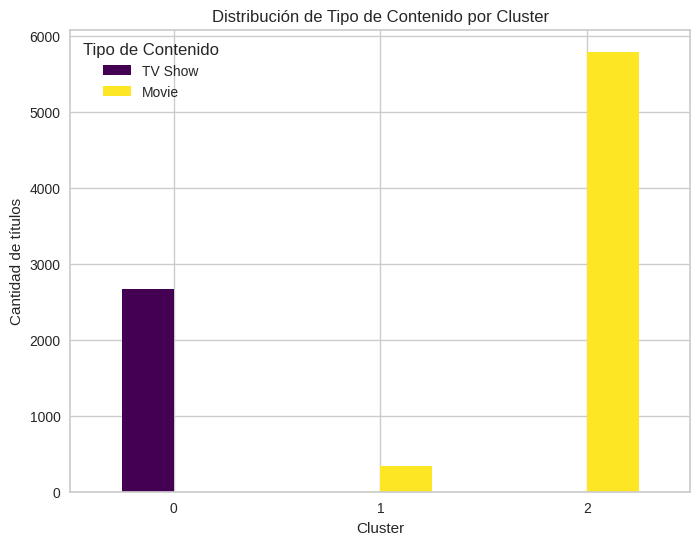

In [294]:
# Contar cuántas películas y series hay en cada cluster
df_plot = net_dummies.groupby(["cluster", "type_Movie"]).size().unstack()

# Renombrar columnas para claridad
df_plot.columns = ["TV Show", "Movie"]

# Crear el gráfico
df_plot.plot(kind="bar", figsize=(8,6), colormap="viridis")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de títulos")
plt.title("Distribución de Tipo de Contenido por Cluster")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Contenido")
plt.show()

Cada Cluster 0 observamos que contiene solo series

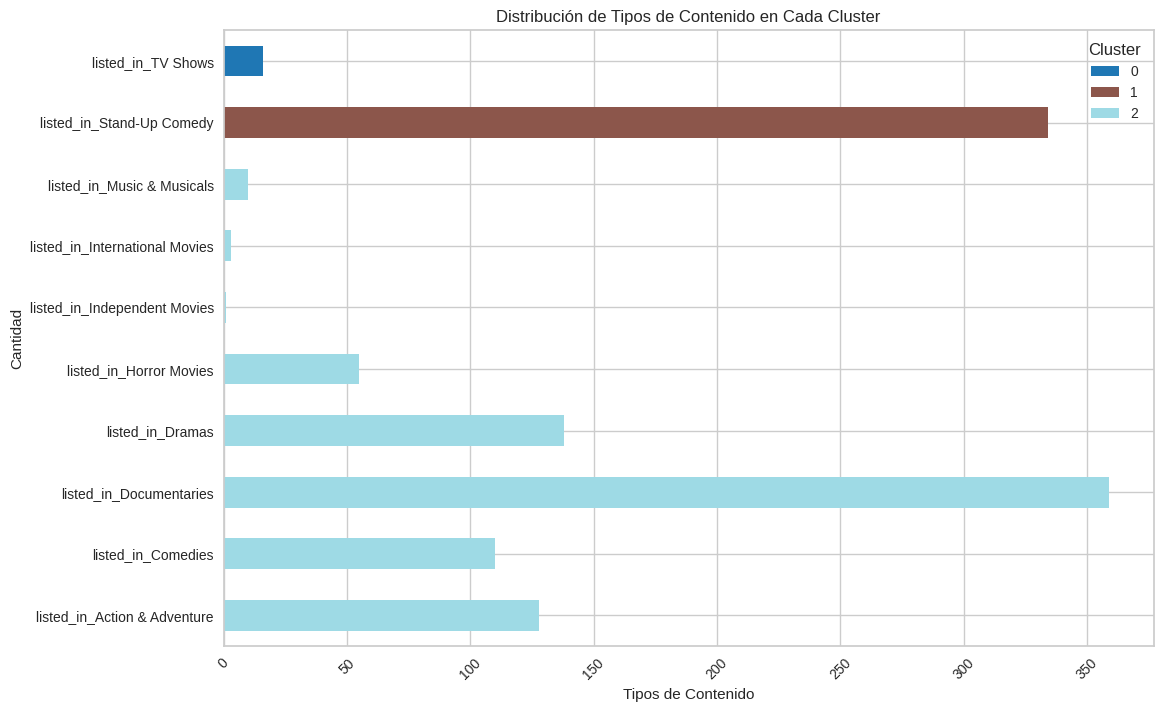

In [295]:
# Crear un DataFrame que contenga las sumas de los tipos de contenido por cluster
content_columns = [
    'listed_in_Action & Adventure', 'listed_in_Comedies',
    'listed_in_Documentaries', 'listed_in_Dramas',
    'listed_in_Horror Movies', 'listed_in_Independent Movies',
    'listed_in_International Movies', 'listed_in_Music & Musicals',
    'listed_in_Stand-Up Comedy', 'listed_in_TV Shows'
]

content_by_cluster = net_dummies.groupby('cluster')[content_columns].sum()

# Transponer para facilitar la creación del gráfico de barras apiladas
content_by_cluster = content_by_cluster.T

# Crear el gráfico de barras apiladas
content_by_cluster.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución de Tipos de Contenido en Cada Cluster')
plt.xlabel('Tipos de Contenido')
plt.ylabel('Cantidad')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

In [296]:
content_by_cluster

cluster,0,1,2
listed_in_Action & Adventure,0,0,128
listed_in_Comedies,0,0,110
listed_in_Documentaries,0,0,359
listed_in_Dramas,0,0,138
listed_in_Horror Movies,0,0,55
listed_in_Independent Movies,0,0,1
listed_in_International Movies,0,0,3
listed_in_Music & Musicals,0,0,10
listed_in_Stand-Up Comedy,0,334,0
listed_in_TV Shows,16,0,0


Se observa en el grafico por genero y en la tabla que el cluster 0 son las series y que el cluster 1 las comedias, los demas generos estan en el cluster 2. Para un mayor analisis podriamos agregar a la data una columna con clasificacion y otra columna con el codigo del cliente que vio los programas para poder hacer un analisis de que titulos recomendar a cada usuario de acuerdo a que categorias ha observado.

In [297]:
titles_by_year_cluster

cluster,0,1,2
release_year,,,
2000,4,1,32
2001,5,1,39
2002,7,1,43
2003,8,0,51
2004,9,0,55
2005,13,1,66
2006,14,4,78
2007,14,1,73
2008,22,3,110


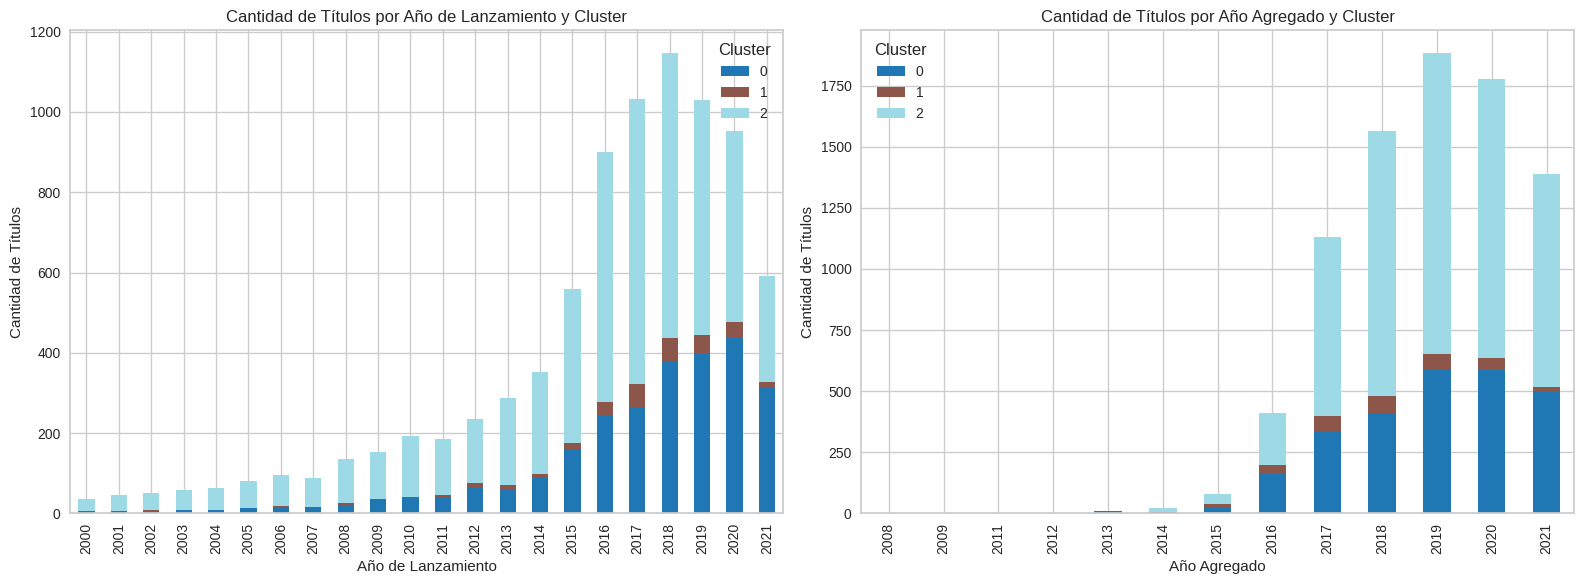

In [298]:
import matplotlib.pyplot as plt

# Filtrar títulos a partir del año 2000 tanto en release_year como en year_added
data_2000 = net_dummies[(net_dummies['release_year'] >= 2000) & (net_dummies['year_added'] >= 2000)]

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Cantidad de títulos por Año de Lanzamiento y Cluster
titles_by_year_cluster = data_2000.groupby(['release_year', 'cluster']).size().unstack(fill_value=0)
titles_by_year_cluster.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Cantidad de Títulos por Año de Lanzamiento y Cluster')
axes[0].set_xlabel('Año de Lanzamiento')
axes[0].set_ylabel('Cantidad de Títulos')
axes[0].legend(title='Cluster')

# Gráfico 2: Cantidad de títulos por Año Agregado y Cluster
titles_by_year_added_cluster = data_2000.groupby(['year_added', 'cluster']).size().unstack(fill_value=0)
titles_by_year_added_cluster.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title('Cantidad de Títulos por Año Agregado y Cluster')
axes[1].set_xlabel('Año Agregado')
axes[1].set_ylabel('Cantidad de Títulos')
axes[1].legend(title='Cluster')

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()



Al ver los graficos por año de lanzamiento y de agregado a la plataforma, podemos observar que por año se agregaron y lanzaron mas del Cluster 2, esto no quiere decir que sean mas de este cluster 2 (comedia), pero si da un indicio que este es un genero que los usuarios consumen, para poder completar el analisis requeriremos obtener la data de visualizaciones.

In [299]:
df_titles_clusters = net_dummies[["title", "cluster"]]

# Mostrar las primeras filas
print(df_titles_clusters.head(20))  # Cambia 20 por la cantidad que quieras ver

                                                title  cluster
0                                Dick Johnson Is Dead        2
1                                       Blood & Water        0
2                                           Ganglands        0
3                               Jailbirds New Orleans        0
4                                        Kota Factory        0
5                                       Midnight Mass        0
6                    My Little Pony: A New Generation        2
7                                             Sankofa        2
8                       The Great British Baking Show        0
9                                        The Starling        2
10                Vendetta: Truth, Lies and The Mafia        0
11                                   Bangkok Breaking        0
12                                       Je Suis Karl        2
13                   Confessions of an Invisible Girl        2
14                    Crime Stories: India Detectives  

Conclusion: podemos concluir que si bien se realizaron las clasificaciones se podria obtener mejor informacion para el negocio si tuvieramos datos como las visualizaciones en cantidad y por usuario, tambien si son producciones propias o compradas, y cual es la productora a la que se compro, cual es el costo de cada titulo, para poder determinar:
1) Cuales son los generos mas vistos lo que ayudaria en decisiones de inversión de contenido
2) Cuales son los generos que ve una persona para recomendarle otros titulos de esos generos
3) Quien produce lo mas visto, para determinar si hay que invertir más en producciones propias o en productoras y en cuales.
4) Con el costo e ingresos de los titulos tambien podriamos determinar el resultado neto de los titulos para saber cuales son rentables y tomar decisiones de cuales sacar de la plataforma o que genero incluir mas en la plataforma.



In [300]:
preds

,0
0,0
1,2
2,2
3,2
4,2
...,...
8802,0
8803,2
8804,0
8805,0


In [301]:
np.ndim(preds)

2

In [302]:
modelo

KMeans(init='random', max_iter=1000, n_clusters=3, random_state=42)

Parece que la variable principal que tomo para los cluster fue la duraccion, porque al ver las medias es donde mas se parecen.

# Entrega anterior:

## 1. Identificar si hay mas peliculas o series, y los años en que fueron agregadas

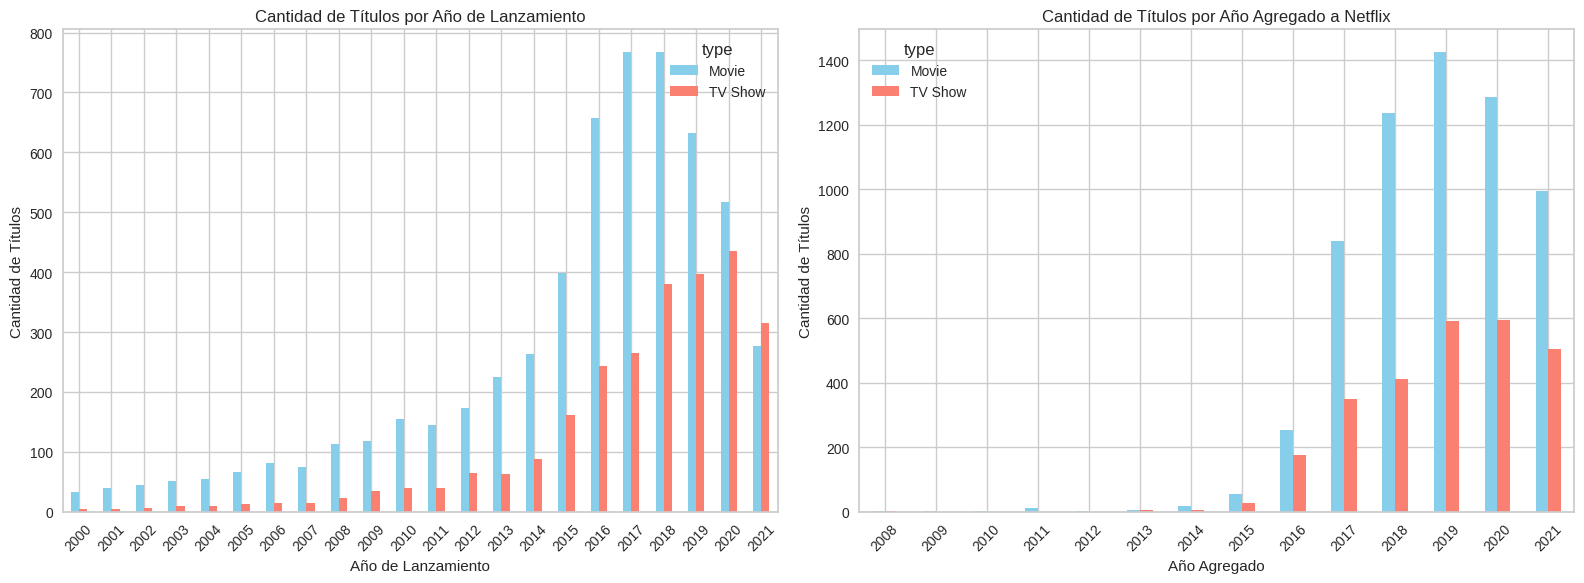

In [303]:
# comparamos la catidad de titulos por año de lanzamiento y por año en que se agregaron a Netflix

import matplotlib.pyplot as plt

# Data for the plots
release_year_counts = net.groupby(['release_year', 'type']).size().unstack(fill_value=0)
year_added_counts = net.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Release Year
filtro2000 = release_year_counts[(release_year_counts.index >= 2000)]
filtro2000.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Cantidad de Títulos por Año de Lanzamiento')
axes[0].set_xlabel('Año de Lanzamiento')
axes[0].set_ylabel('Cantidad de Títulos')
axes[0].tick_params(axis='x', rotation=45)


# Plot 2: Year Added
year_added_counts.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Cantidad de Títulos por Año Agregado a Netflix')
axes[1].set_xlabel('Año Agregado')
axes[1].set_ylabel('Cantidad de Títulos')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [304]:
counts= net['type'].value_counts()
diferencia = counts['TV Show'] - counts['Movie']
print(counts)
print(diferencia)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
-3455


In [305]:
filtropeli = net[(net['type'] == 'Movie')]
count_by_year= filtropeli.groupby(['release_year','type']).size().reset_index(name='count_peliculas_lanzamiento').sort_values(by='count_peliculas_lanzamiento', ascending=False)

print(count_by_year)

    release_year   type  count_peliculas_lanzamiento
69          2018  Movie                          767
68          2017  Movie                          767
67          2016  Movie                          658
70          2019  Movie                          633
71          2020  Movie                          517
..           ...    ...                          ...
12          1961  Movie                            1
14          1963  Movie                            1
17          1966  Movie                            1
5           1947  Movie                            1
4           1946  Movie                            1

[73 rows x 3 columns]


In [306]:
filtropeliagre = net[(net['type'] == 'Movie')]
count_by_year= filtropeliagre.groupby(['year_added','type']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(count_by_year)

    year_added   type  count
11        2019  Movie   1424
12        2020  Movie   1284
10        2018  Movie   1237
13        2021  Movie    993
9         2017  Movie    839
8         2016  Movie    253
7         2015  Movie     56
6         2014  Movie     19
3         2011  Movie     13
5         2013  Movie      6
4         2012  Movie      3
1         2009  Movie      2
0         2008  Movie      1
2         2010  Movie      1


In [307]:
filtroserielan = net[(net['type'] == 'TV Show')]
count_by_year= filtroserielan.groupby(['release_year','type']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(count_by_year)

    release_year     type  count
44          2020  TV Show    436
43          2019  TV Show    397
42          2018  TV Show    380
45          2021  TV Show    315
41          2017  TV Show    265
40          2016  TV Show    244
39          2015  TV Show    162
38          2014  TV Show     88
36          2012  TV Show     64
37          2013  TV Show     63
35          2011  TV Show     40
34          2010  TV Show     40
33          2009  TV Show     34
32          2008  TV Show     23
31          2007  TV Show     14
30          2006  TV Show     14
29          2005  TV Show     13
27          2003  TV Show     10
28          2004  TV Show      9
26          2002  TV Show      7
23          1999  TV Show      7
25          2001  TV Show      5
21          1997  TV Show      4
17          1993  TV Show      4
22          1998  TV Show      4
24          2000  TV Show      4
14          1990  TV Show      3
16          1992  TV Show      3
20          1996  TV Show      3
18        

In [308]:
filtroserielan = net[(net['type'] == 'TV Show')]
count_by_year= filtroserielan.groupby(['year_added','type']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(count_by_year)

   year_added     type  count
8        2020  TV Show    595
7        2019  TV Show    592
9        2021  TV Show    505
6        2018  TV Show    412
5        2017  TV Show    349
4        2016  TV Show    176
3        2015  TV Show     26
1        2013  TV Show      5
2        2014  TV Show      5
0        2008  TV Show      1


In [309]:
# Filtrar los titulos lanzadas entre 2019 y 2021
titulos_2019_2021 = net[(net['release_year'] >= 2019) & (net['release_year'] <= 2021)]

# Tabla1: Contar la cantidad de titulos lanzadas por año
lanzadas_por_ano = titulos_2019_2021['release_year'].value_counts().sort_index().reset_index()
lanzadas_por_ano.columns = ['Año de Lanzamiento', 'Número de titulos Lanzadas']

# Filtrar los titulos lanzados entre 2019 y 2021 y agregadas en el mismo año
titulos_mismo_ano = net[(net['release_year'] >= 2019) &
                         (net['release_year'] <= 2021) &
                         (net['release_year'] == net['year_added'])]



# Tabla 2: Contar la cantidad de titulos agregados a Netflix el mismo año de lanzamiento
agregadas_mismo_ano= titulos_mismo_ano['release_year'].value_counts().sort_index().reset_index()
agregadas_mismo_ano.columns = ['Año de Lanzamiento', 'Número de titulos Agregados']



# Unir ambas tablas
tabla_resumida = pd.merge(lanzadas_por_ano, agregadas_mismo_ano, on='Año de Lanzamiento', how='left').fillna(0)

# Mostrar la tabla
print(tabla_resumida)

   Año de Lanzamiento  Número de titulos Lanzadas  Número de titulos Agregados
0                2019                        1030                          667
1                2020                         953                          777
2                2021                         592                          589


### **1) Observamos que existen 6131 peliculas y 2676 series en Netflix, porlo que hay 3455 Peliculas mas que series.**
### **2) También podemos observar que los lanzamientos de la peliculas tuvieron una baja a partir del 2019, en cambio las series bajaron en el 2021, esto probablemente se deba a la pandemia del Covid19**
###**3) En cuanto al comportamiento de los titulos agregados a la plataforma son muy parecidos al comportamiento de los lanzamientos, disminuyendo en los ultimos años de la data, sin embargo se observa que la mayor parte de los titulos que se lanzaron en 2021 en plena pandemia se agregaron ese mismo año a la plataforma lo que se puede deber a que no estaban funcionando los cines (hice una tabla de los ultimos 3 años, titulos agregados el mismo año)**


## 2. Cual es la clasificación con mayor contenido

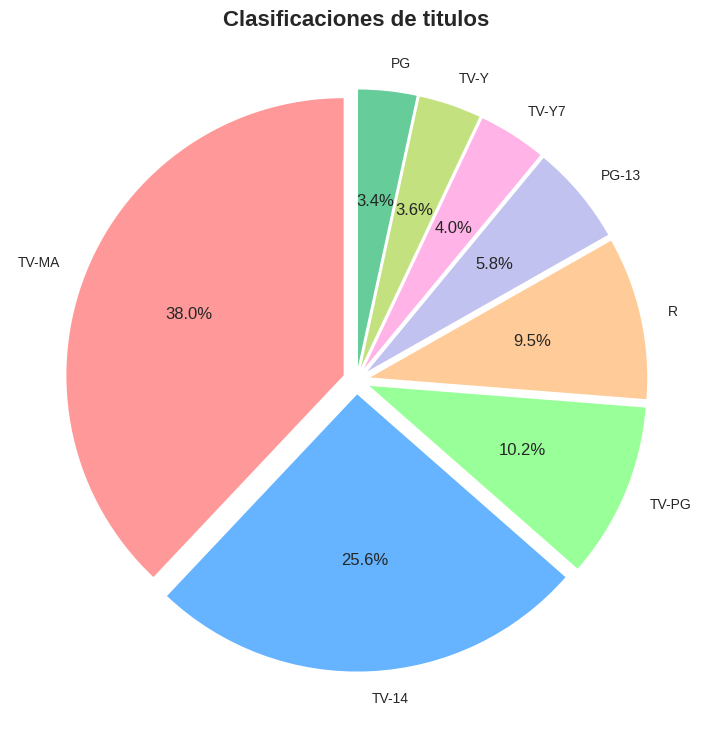

In [310]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#66cc99']
net['rating'].value_counts().head(8).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(9, 9),
    colors=colors,
    explode=[0.05] * 8)
plt.title('Clasificaciones de titulos', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

In [311]:
counts= net['rating'].value_counts()
print(counts)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


### **La clasificación con mas contenido es la TV-MA que significa Apto solo para mayores, seguido de TV-14 que significa no apto para menores de 14 años.**

### **Podriamos analizar cuales son las clasificaciones de los contenidos mas vistos (falta esa data), para poder definir cuales contenidos se deben enfocar en produccir o comprar los derechos.**

### **También sería interesante comparar con las clasificaciones de contenido de otras plataformar, y sus visualizaciones para poder tomar decisiones de enfoques, para atraer a los usuarios.**

TV-MA Apto solo para mayores: Este programa esta destinado específicamente al público adulto y, por lo tanto, puede ser inadecuado para menores de 17 años. Este programa presenta una o más de las siguientes características: lenguaje obsceno e indecente (L), escenas sexuales explícitas (S), o violencia gráfica (V)

TV-14: SE RECOMIENDA ENFÁTICAMENTE LA SUPERVISIÓN DE LOS PADRES: Este programa contiene material que los padres pueden considerar inadecuado para niños
menores de 14 años. Se insta a los padres a dedicar una mayor atención al supervisar este programa y se les advierte que no dejen solos a los niños menores de 14 años que estén viéndolo. Este programa presenta una o más de las siguientes características: diálogos sumamente sugestivos (D), lenguaje grosero fuerte (L), situaciones intensas de naturaleza sexual (S), o violencia intensa (V).

## 3 Cuanto tardan las peliculas en subir a la plataforma desde su lanzamiento

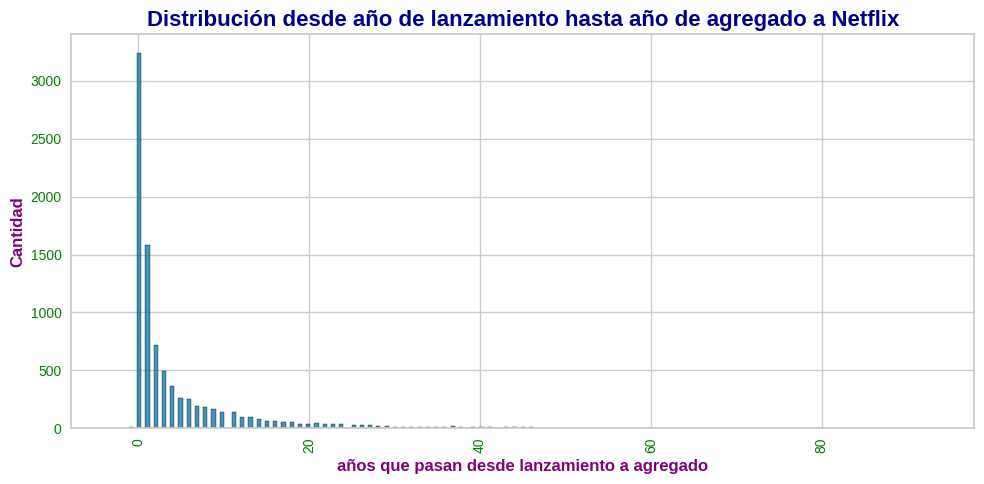

In [312]:
plt.figure(figsize=(10, 5))
sns.histplot(net['time_added'])
plt.title('Distribución desde año de lanzamiento hasta año de agregado a Netflix', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('años que pasan desde lanzamiento a agregado', fontsize=12, fontweight='bold', color='purple')
plt.ylabel('Cantidad', fontsize=12, fontweight='bold', color='purple')
plt.xticks(rotation=90, fontsize=10, color='green')
plt.yticks(fontsize=10, color='green')

plt.tight_layout()
plt.show()

In [313]:
count_by_time= net.groupby(['time_added']).size().reset_index(name='count titulos').sort_values(by='count titulos', ascending=False)
print(count_by_time)

    time_added  count titulos
3            0           3241
4            1           1585
5            2            714
6            3            491
7            4            367
..         ...            ...
67          70              1
63          63              1
60          60              1
1           -2              1
74          93              1

[75 rows x 2 columns]


### hice la siguiente tabla para ver en que años el mayor porcentaje de los titulos lanzados se subieron el mismo año.

In [314]:
# Filtrar los titulos lanzadas entre 2015 y 2021 debido a que desde 2015 comenzo a agregar la mayor parte del contenido
titulos_2015_2021 = net[(net['release_year'] >= 2015) & (net['release_year'] <= 2021)]

# Tabla1: Contar la cantidad de titulos lanzadas por año
lanzadas_por_ano = titulos_2015_2021['release_year'].value_counts().sort_index().reset_index()
lanzadas_por_ano.columns = ['Año de Lanzamiento', 'Número de titulos Lanzados']

# Filtrar los titulos lanzados entre 2015 y 2021 y agregadas en el mismo año
titulos_mismo_ano = titulos_2015_2021[titulos_2015_2021['release_year'] == titulos_2015_2021['year_added']]



# Tabla 2: Contar la cantidad de titulos agregados a Netflix el mismo año de lanzamiento
agregadas_mismo_ano= titulos_mismo_ano['release_year'].value_counts().sort_index().reset_index()
agregadas_mismo_ano.columns = ['Año de Lanzamiento', 'Número de titulos Agregados']

# Unir ambas tablas
tabla_resumida = pd.merge(lanzadas_por_ano, agregadas_mismo_ano, on='Año de Lanzamiento', how='left').fillna(0)

# Calcular el porcentaje de películas agregadas en el mismo año respecto al total de titulos lanzadas
tabla_resumida['Porcentaje de titulos Agregados'] = ((tabla_resumida['Número de titulos Agregados'] / tabla_resumida['Número de titulos Lanzados']) * 100).round(2)

# Mostrar la tabla
print(tabulate(tabla_resumida, headers='keys', tablefmt='pretty'))

+---+--------------------+----------------------------+-----------------------------+---------------------------------+
|   | Año de Lanzamiento | Número de titulos Lanzados | Número de titulos Agregados | Porcentaje de titulos Agregados |
+---+--------------------+----------------------------+-----------------------------+---------------------------------+
| 0 |       2015.0       |           560.0            |            52.0             |              9.29               |
| 1 |       2016.0       |           902.0            |            189.0            |              20.95              |
| 2 |       2017.0       |           1032.0           |            381.0            |              36.92              |
| 3 |       2018.0       |           1147.0           |            561.0            |              48.91              |
| 4 |       2019.0       |           1030.0           |            667.0            |              64.76              |
| 5 |       2020.0       |           953

In [315]:
# Crear una columna para identificar los menores a cero, ya que no es normal que sean menores a cero, no pueden haber peliculas agregadas antes del lanzamiento
plt.figure(figsize=(10, 5))
net['outlier'] = (net['time_added'] < 0)  # Crear una columna para identificar los outliers
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,numero_duracion,time_added,listed_in_1,listed_in_2,listed_in_3,outlier
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,90,1,Documentaries,None,None,False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2,0,International TV Shows,TV Dramas,TV Mysteries,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,1,0,Crime TV Shows,International TV Shows,TV Action & Adventure,False
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,1,0,Docuseries,Reality TV,None,False
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2,0,International TV Shows,Romantic TV Shows,TV Comedies,False


<Figure size 1000x500 with 0 Axes>

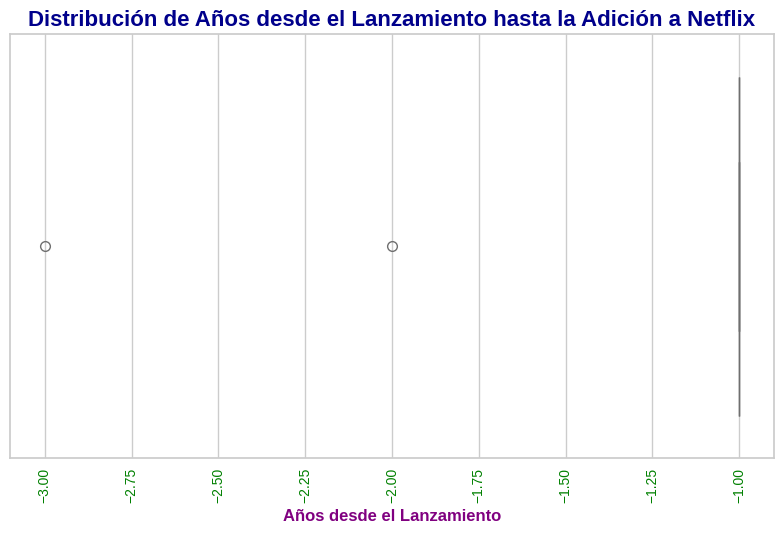

In [316]:
# Separar los outliers de los datos normales
outliers = net[net['outlier']]
normales = net[~net['outlier']]
# crear grafico de caja
sns.boxplot(x=outliers['time_added'], color='skyblue')
plt.title('Distribución de Años desde el Lanzamiento hasta la Adición a Netflix', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Años desde el Lanzamiento', fontsize=12, fontweight='bold', color='purple')
plt.xticks(rotation=90, fontsize=10, color='green')
plt.tight_layout()
plt.show()

In [317]:
# Filtrar los valores menores a cero
menores_a_cero = net[net['time_added'] < 0]

# Contar la cantidad de valores menores a cero
cantidad_menores_a_cero = menores_a_cero.shape[0]

# Mostrar la cantidad
print(f'Cantidad de títulos con diferencia menor a cero: {cantidad_menores_a_cero}')

# Mostrar la lista de títulos con diferencia menor a cero
lista_menores_a_cero = menores_a_cero[['title', 'release_year', 'year_added', 'time_added']]
print(lista_menores_a_cero)

Cantidad de títulos con diferencia menor a cero: 14
                           title  release_year  year_added  time_added
1551                       Hilda          2021        2020          -1
1696                Polly Pocket          2021        2020          -1
2920               Love Is Blind          2021        2020          -1
3168                Fuller House          2020        2019          -1
3287          Maradona in Mexico          2020        2019          -1
3369             BoJack Horseman          2020        2019          -1
3433            The Hook Up Plan          2020        2019          -1
4844   Unbreakable Kimmy Schmidt          2019        2018          -1
4845        Arrested Development          2019        2018          -1
5394  Hans Teeuwen: Real Rancour          2018        2017          -1
5658                      Sense8          2018        2016          -2
5677                 Tokyo Trial          2017        2016          -1
7063                    I

### **1) En el grafico de todo el periodo, podemos observar que la mayor parte de los titulos se agregan el mismo año del Lanzamiento, lo que validamos con una tabla de datos adicionalmente**

### **2) Despues debido a que en el grafico del primer punto observamos que se comenzaron a agregar mas titulos a partir del 2015, hicimos una tabla acotando a partir de ese año y calculando los porcentajes por año en que se agregaron titulos que se lanzaron el mismo año, esto dio como resultado porcentajes altos en 2020 y 2021 (81% y 99% respectivamente) lo que nos hace suponer que se debe a que los cines estaban cerrados por la pendemia. En este sentido seria interesante analizar los aumentos de los suscriptores a Nteflix mas adelante, para lo cual se requeriria la data**

### **3) Al observar la diferencia entre los años de lanzamiento y de agregado a Netflix se indentificaron que la data contiene años de agregados anteriores al lanzamiento del titulo, por lo que hicimos un grafico y una tabla para identificarlos, estos datos son inusuales y posiblemente son errores en la data, por lo que se deberia hablar con los responsables de la data para saber si se deben excluir**
